In [1]:
import os
import cv2
import typing
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# CONSTANTS
MAX_RGB = 255.0
CURR_DIR = os.getcwd()

TRAIN_DIR = os.path.join(CURR_DIR, 'train_data')
TRAIN_IMG_DIR = os.path.join(TRAIN_DIR, 'train_images')
TRAIN_LABELS = os.path.join(TRAIN_DIR, 'train_labels.csv')

VAL_DIR = os.path.join(CURR_DIR, 'validation_data')
VAL_IMG_DIR = os.path.join(VAL_DIR, 'validation_images')
VAL_LABELS = os.path.join(VAL_DIR, 'validation_labels.csv')

In [3]:
# reading in each images from validation - naive grey diff, contour count method
def read_img_from_dir(image_dir):
    '''
    Helper function to read in image files using cv2.
    TODO:
    1. resize image
    2. match with labels
    '''
    imgs = []
    print(image_dir)
    # Reading images in RGB numpy array
    for root, dirs, filenames in os.walk(image_dir):
        for filename in filenames:
            filepath = os.path.join(image_dir, filename)
            image = cv2.imread(filepath)
            imgs.append(image)
            img = np.float32(image / MAX_RGB)
            test = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
            ret, thresh = cv2.threshold(cv2.cvtColor(test, cv2.COLOR_BGR2GRAY), 220, 255, cv2.THRESH_BINARY)
            
            img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            img_gray = np.asarray(img_gray, np.float32)
            diff = cv2.absdiff(img_gray, thresh)
            
            plt.imshow(diff)
            plt.show()
            
    return imgs

D:\projects\statistics-hack-2021\validation_data\validation_images


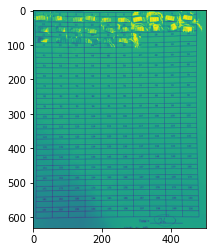

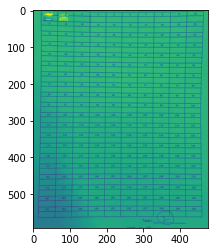

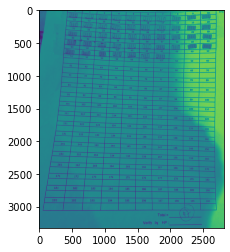

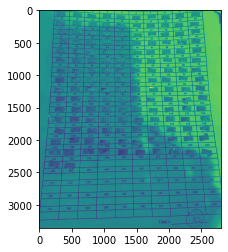

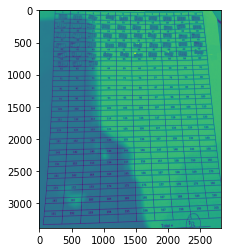

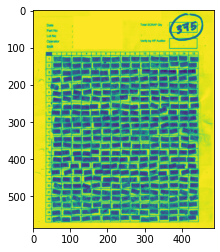

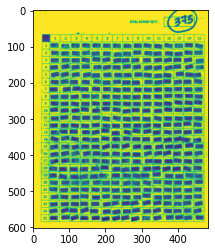

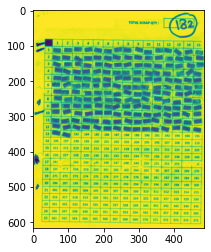

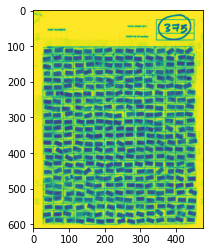

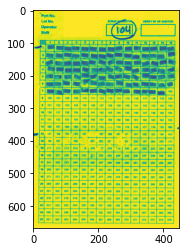

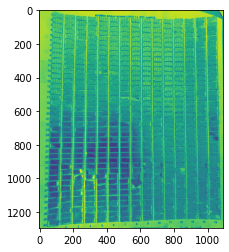

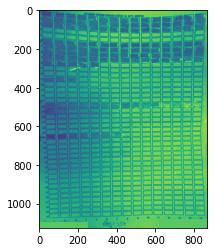

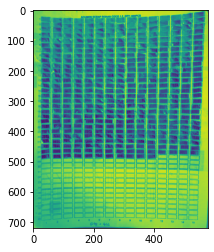

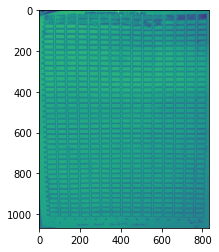

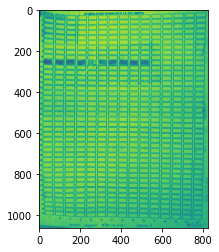

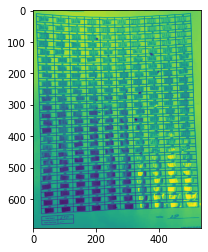

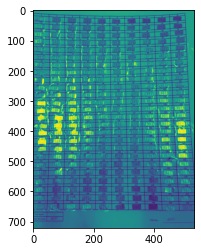

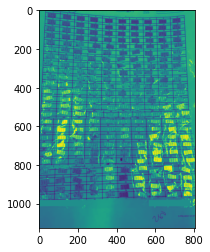

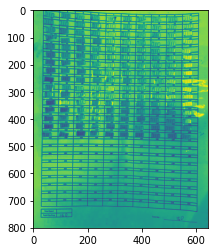

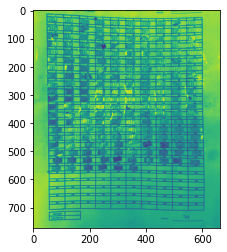

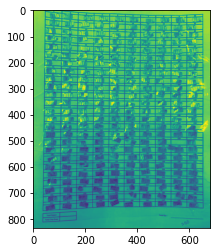

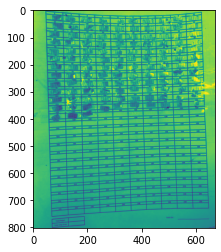

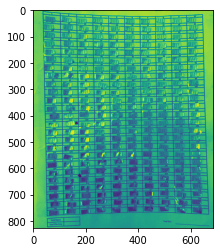

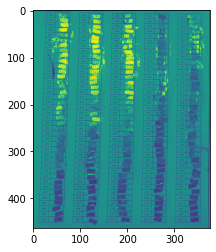

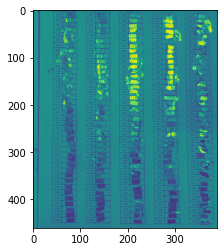

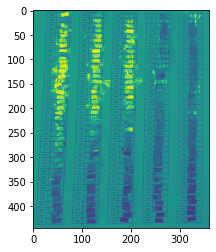

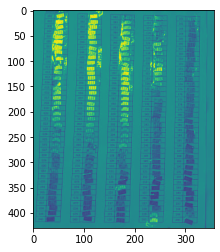

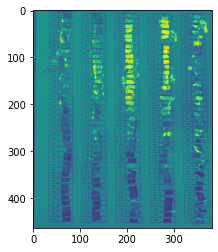

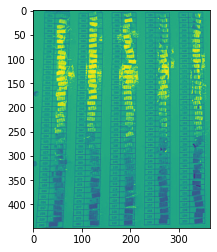

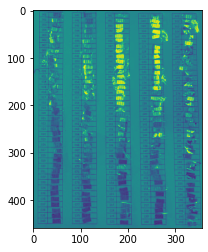

[array([[[158, 157, 159],
         [156, 155, 157],
         [151, 153, 154],
         ...,
         [158, 157, 159],
         [158, 157, 159],
         [158, 157, 159]],
 
        [[157, 156, 158],
         [160, 159, 161],
         [151, 153, 154],
         ...,
         [158, 157, 159],
         [158, 157, 159],
         [158, 157, 159]],
 
        [[155, 157, 158],
         [158, 160, 161],
         [146, 148, 149],
         ...,
         [158, 157, 159],
         [158, 157, 159],
         [158, 157, 159]],
 
        ...,
 
        [[119, 119, 125],
         [119, 119, 125],
         [119, 119, 125],
         ...,
         [149, 146, 148],
         [149, 146, 148],
         [149, 146, 148]],
 
        [[120, 120, 126],
         [119, 119, 125],
         [119, 119, 125],
         ...,
         [149, 146, 148],
         [149, 146, 148],
         [149, 146, 148]],
 
        [[119, 119, 125],
         [119, 119, 125],
         [119, 119, 125],
         ...,
         [149, 146, 148],
  

In [4]:
read_img_from_dir(VAL_IMG_DIR)